## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm  
sns.set_style('darkgrid')
sns.set_context('talk')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Reading Excel Data

In [2]:
df=pd.read_excel(r"...\Complete Data for Modeling.xlsx", "UG Real Data")
df = df.set_index('Date')
df.fillna(0, inplace=True)
df.drop(["Academic Year", "UG_HSS_course_registration", "UG_AB_Tuition"], axis=1, inplace=True)
df.tail() # Show the first 5 rows in the data

,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings
Date,,,,,
2019-11-01,6355,580.375412,42.471651,0.062696,1116.697360
2019-12-01,3827,586.385696,39.322165,0.060269,1123.347626
2020-01-01,8771,587.088754,36.888240,0.060306,1106.633268
2020-02-01,6405,578.045429,27.127838,0.062522,1113.736063
2020-03-01,6233,577.495902,12.840000,0.080665,1124.539063


## Exploring the Data

### Plotting each variable/columns in the dataset by date

UG_course_registration


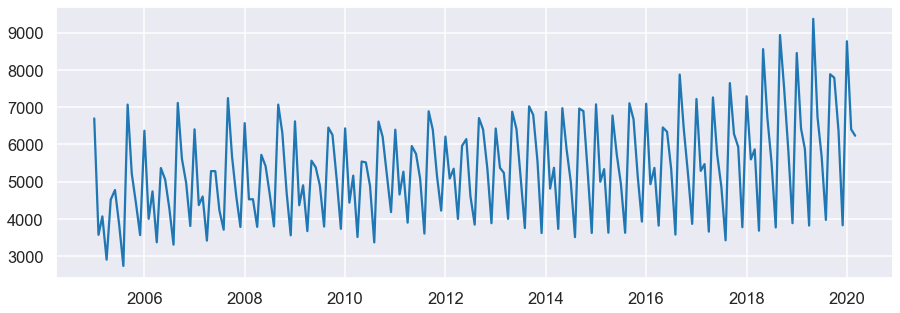

Weigted_Tuition_UG


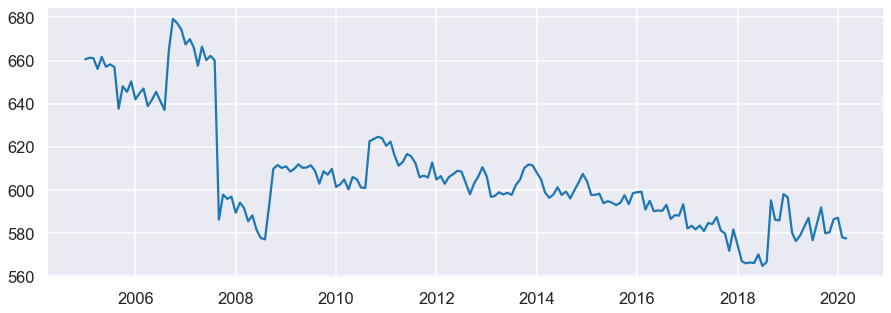

WCS


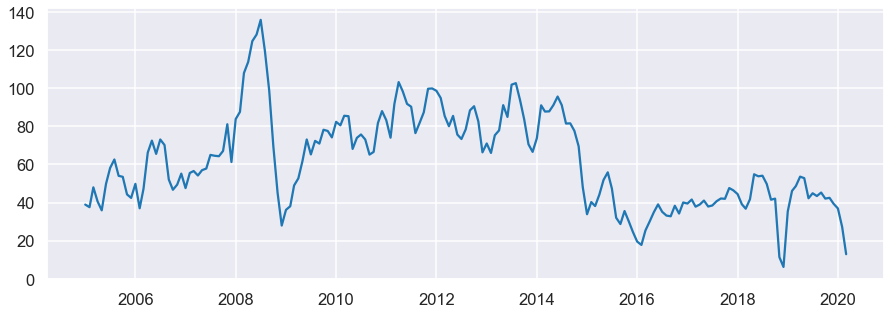

UnempRate


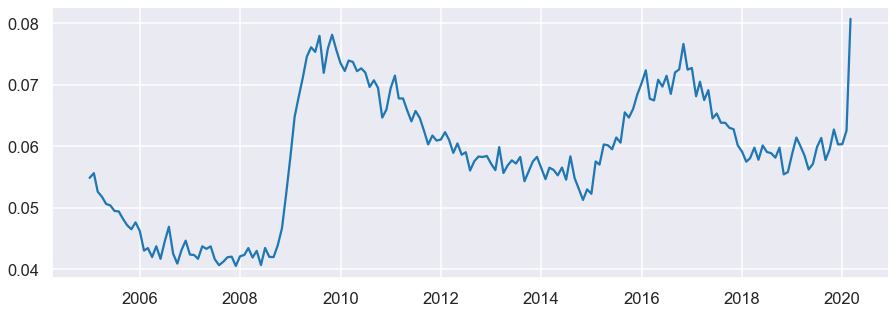

Weekly_Earnings


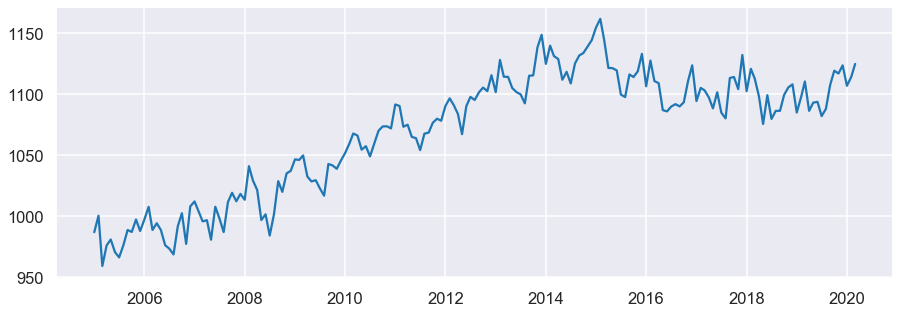

In [3]:
# This loops the plot for by columns in the data set
for c in df.columns:
    plt.figure(figsize=(15,5))
    plt.plot(df[c])
    print(c)
    plt.show()

### Checking the distribution of the variables using histograms

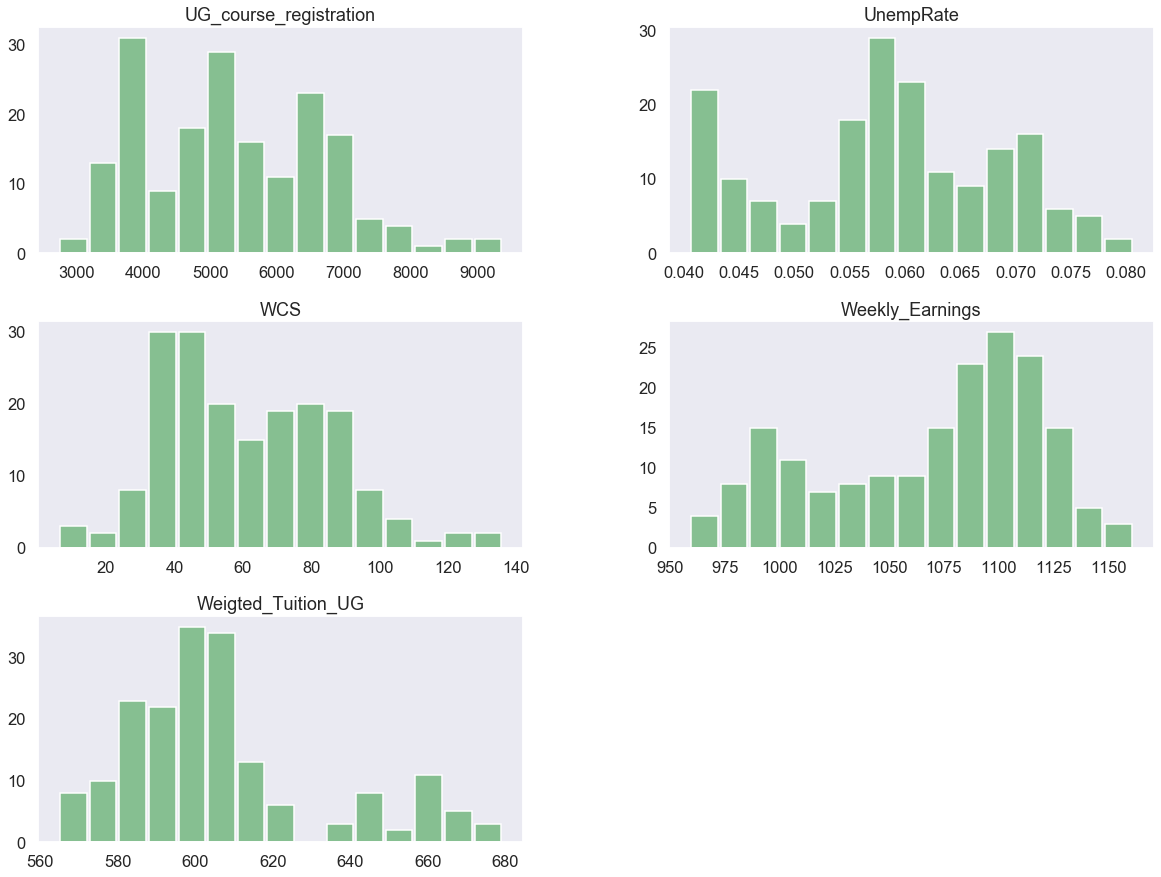

In [4]:
df.hist(bins=15, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

### Generating a correlation matrix for the variables

In [5]:
import pingouin as pg
df.rcorr(method='pearson', padjust='holm')

,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings
UG_course_registration,-,***,,,**
Weigted_Tuition_UG,-0.279,-,,***,***
WCS,-0.085,0.022,-,,
UnempRate,0.103,-0.432,-0.187,-,***
Weekly_Earnings,0.254,-0.681,-0.158,0.496,-


from scipy.stats import pearsonr
sns.set_style('white')
sns.set_context('talk')

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.2f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
    
g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

### Normalizing Data

The distribution plots of the data show that the variables are of different scales. The purpose normalizing the data is to standardize the scale for all the variables

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc_in = MinMaxScaler(feature_range=(0, 1))


# Log transforamtion
df_log=np.log(df)
print("df_log")
print(df_log.tail())
print("")
print("")

# Scaling the original data to be in the range 0-1
df_scaled = pd.DataFrame(sc_in.fit_transform(df), columns=df.columns, index=df.index)
print("df_scaled")
print(df_scaled.head())
print("")
print("")
# Scaling the log transformed data to be in the range of 0-1
df_log_scaled = pd.DataFrame(sc_in.fit_transform(df_log), columns=df_log.columns, index=df_log.index)
print("df_log_scaled")
print(df_log_scaled.head())

df_log
            UG_course_registration  Weigted_Tuition_UG       WCS  UnempRate  \
Date                                                                          
2019-11-01                8.756997            6.363675  3.748837  -2.769450   
2019-12-01                8.249836            6.373978  3.671788  -2.808936   
2020-01-01                9.079206            6.375176  3.607893  -2.808322   
2020-02-01                8.764834            6.359652  3.300560  -2.772232   
2020-03-01                8.737613            6.358701  2.552565  -2.517446   

            Weekly_Earnings  
Date                         
2019-11-01         7.018131  
2019-12-01         7.024068  
2020-01-01         7.009078  
2020-02-01         7.015475  
2020-03-01         7.025129  


df_scaled
            UG_course_registration  Weigted_Tuition_UG       WCS  UnempRate  \
Date                                                                          
2005-01-01                0.596927            0.836004  0.2

### Understanding the Time Series data

#### Decomposing series into trend, seasonality and random nose and checking for stationariity using Augmented Dickey Fuller (ADF) test

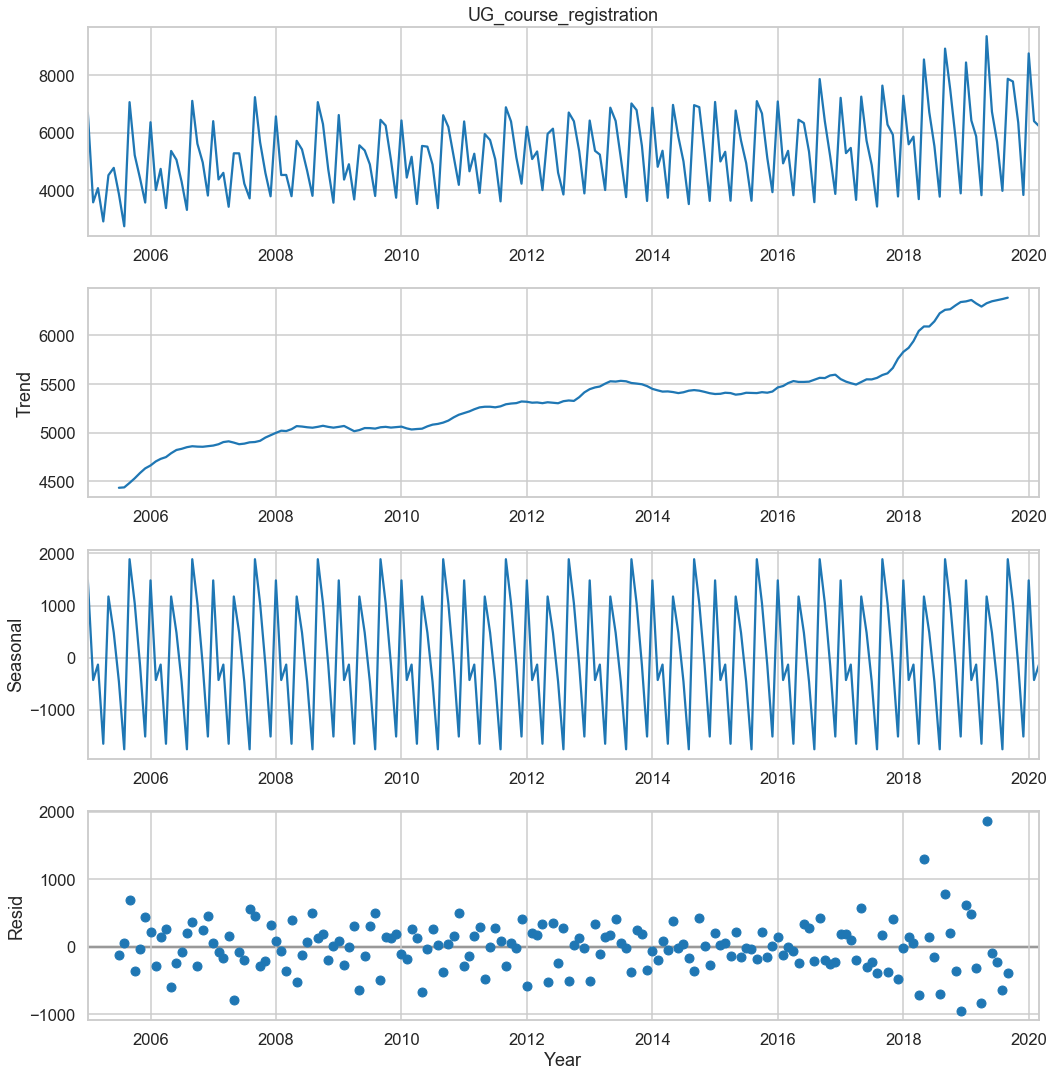

UG_course_registration - Results of Dickey-Fuller Test:
ADF Statistic: -0.000480
p-value: 0.958492
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576

UG_course_registration - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 1.127036
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


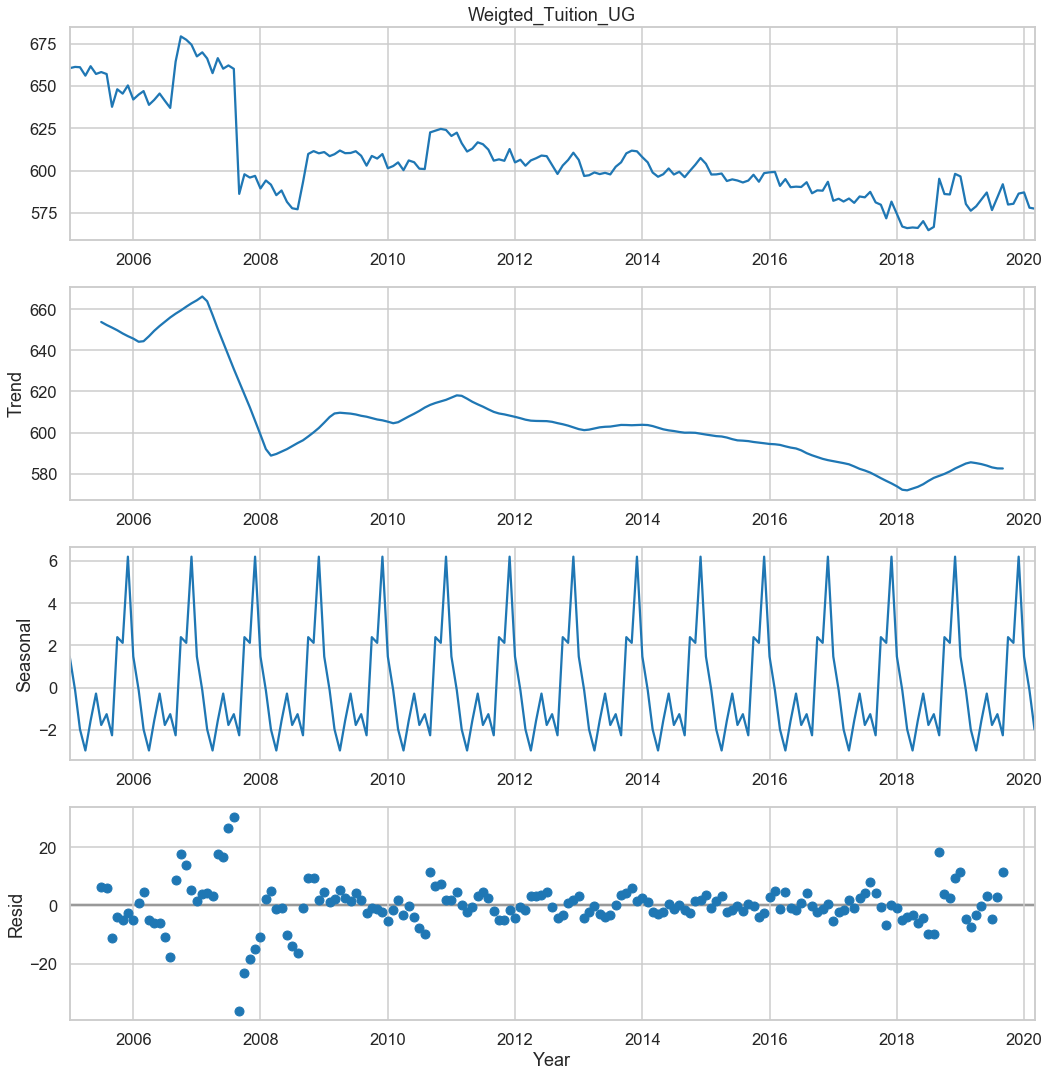

Weigted_Tuition_UG - Results of Dickey-Fuller Test:
ADF Statistic: -2.512329
p-value: 0.112503
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575

Weigted_Tuition_UG - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.973040
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


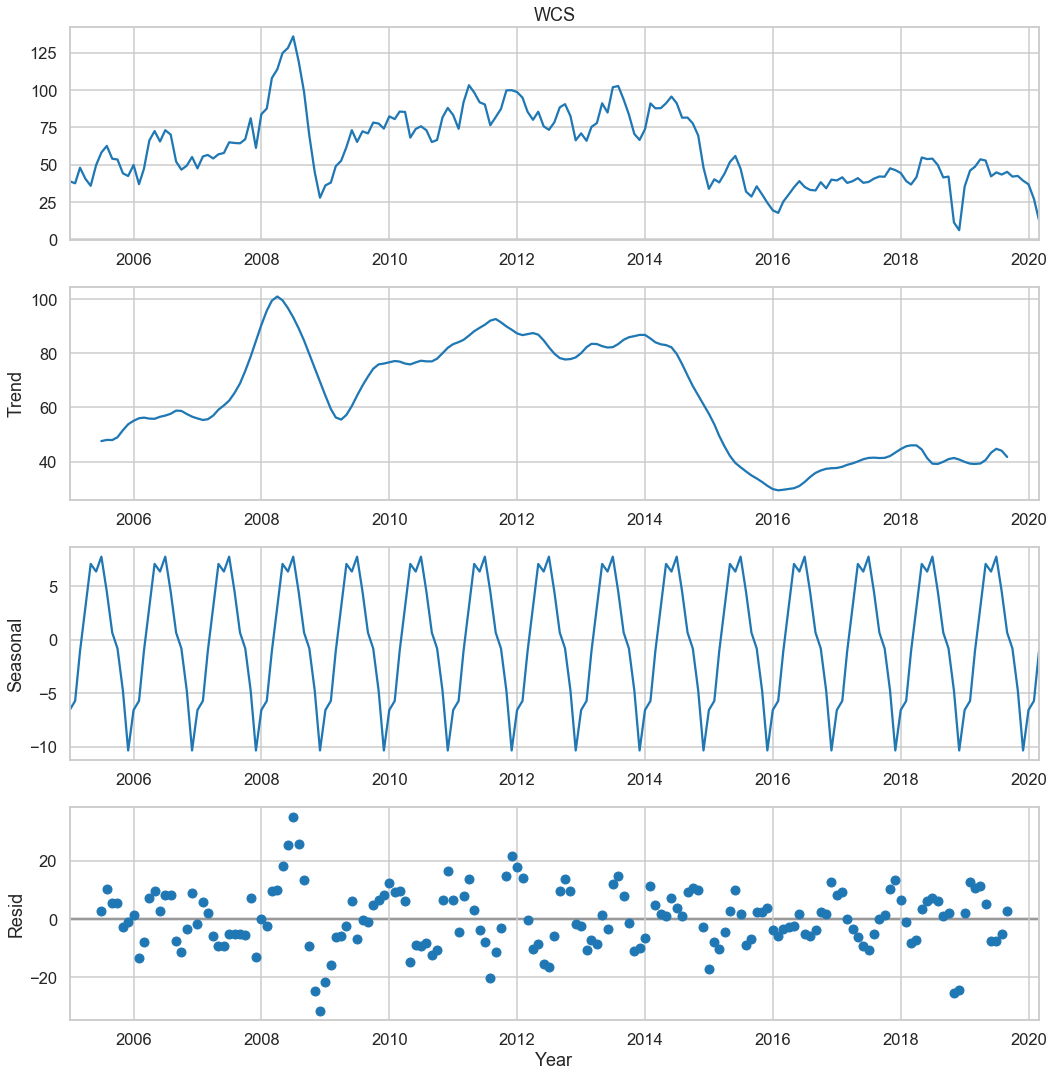

WCS - Results of Dickey-Fuller Test:
ADF Statistic: -2.961252
p-value: 0.038675
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575

WCS - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.493074
p-value: 0.043227
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


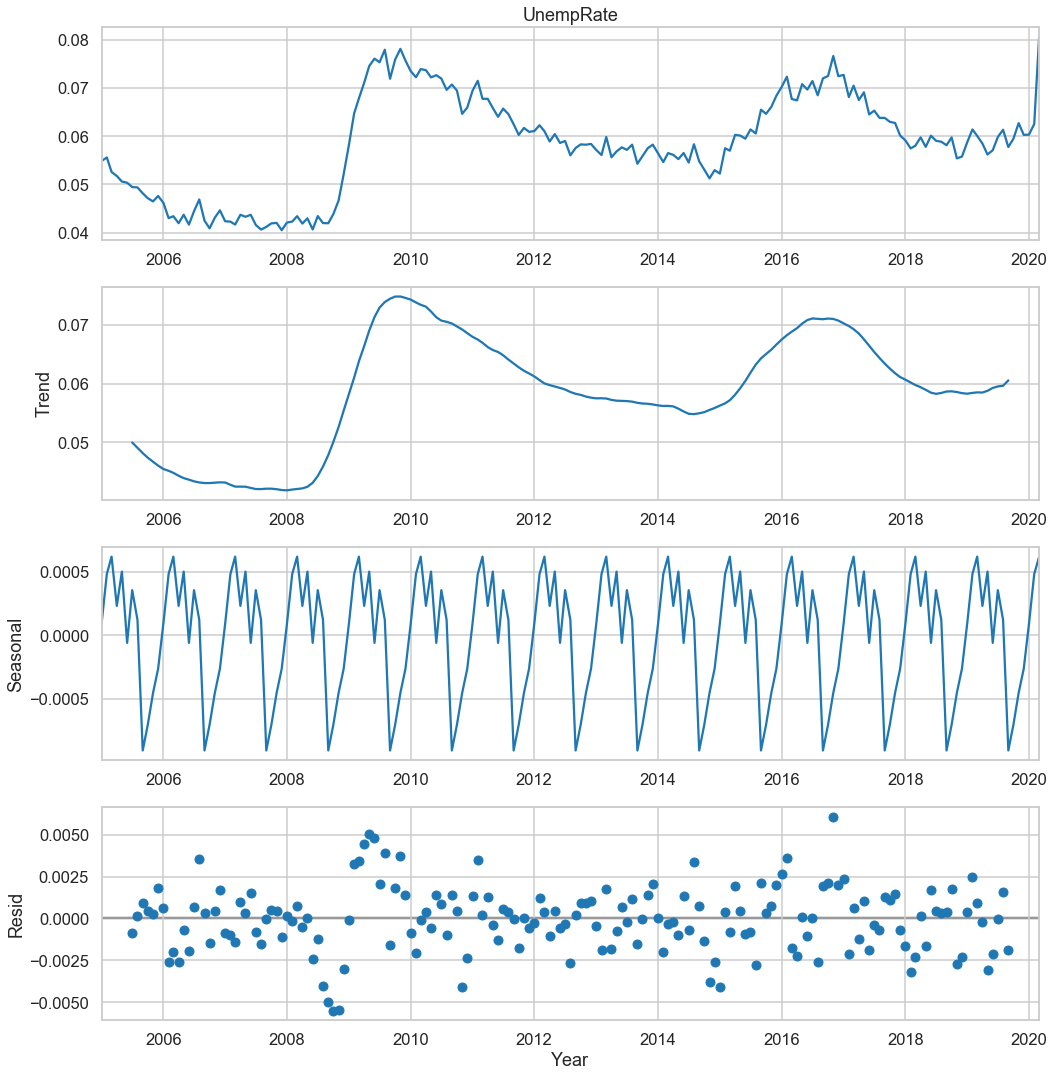

UnempRate - Results of Dickey-Fuller Test:
ADF Statistic: -1.926633
p-value: 0.319638
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576

UnempRate - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.416166
p-value: 0.070187
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


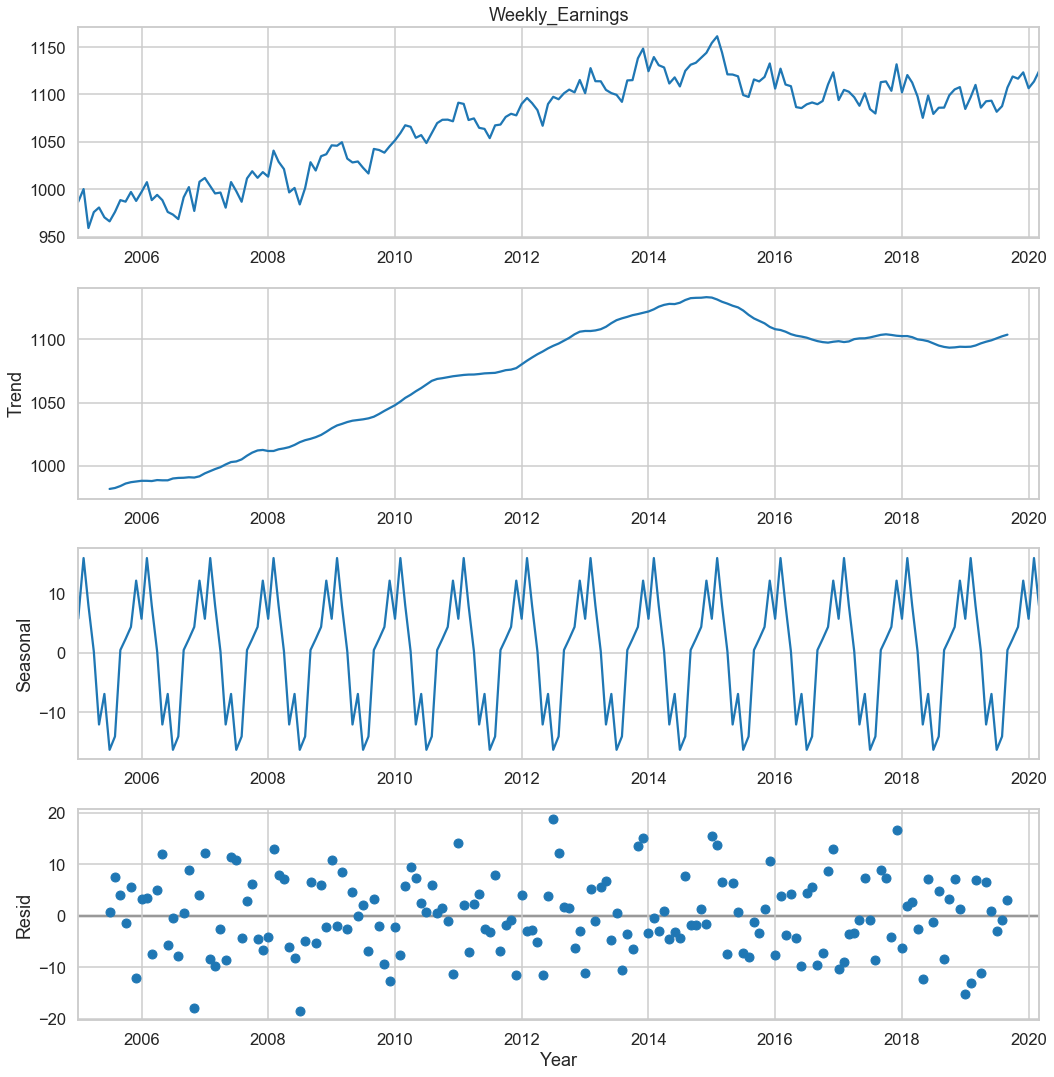

Weekly_Earnings - Results of Dickey-Fuller Test:
ADF Statistic: -1.602821
p-value: 0.482176
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576

Weekly_Earnings - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 1.093356
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [7]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

sns.set_style('whitegrid')
sns.set_context('talk')

rcParams['figure.figsize'] =15, 15

def decomp(df):
    decomposition = sm.tsa.seasonal_decompose(df, 
                                              model = 'additive')  
    fig = decomposition.plot()
    plt.xlabel('Year')
    plt.show()
    
    print (f'{c} - Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")  
    print (f'{c} - Results Kwiatkowski-Phillips-Schmidt-Shin:')
    dftest = kpss(df)
    print('KPSS Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[3].items():
        print('\t%s: %.3f' % (key, value))

for c in df.columns: 
    print(decomp(df[c]))

## Building the Model

In [25]:
# Split data into Train and Test

train_start_dt = '2005-01-01'
train_end_dt = '2018-12-31'
test_end_dt = '2020-03-31'

train_df = df.loc[:train_end_dt]
test_df = df.loc[train_end_dt:test_end_dt]

train_log = df_log.loc[:train_end_dt]
test_log = df_log.loc[train_end_dt:test_end_dt]

train_scaled = df_scaled.loc[:train_end_dt]
test_scaled = df_scaled.loc[train_end_dt:test_end_dt]

print("Train Log Data")
print(train_log.tail(12))
print("")
print("")

print("Test Log Data")
print(test_log)



Train Log Data
            UG_course_registration  Weigted_Tuition_UG       WCS  UnempRate  \
Date                                                                          
2018-01-01                8.894533            6.353286  3.794067  -2.828213   
2018-02-01                8.629986            6.340171  3.665918  -2.856582   
2018-03-01                8.676758            6.338544  3.604734  -2.846859   
2018-04-01                8.211211            6.339215  3.731333  -2.817655   
2018-05-01                9.054855            6.338740  4.004622  -2.851199   
2018-06-01                8.813141            6.345819  3.985187  -2.811773   
2018-07-01                8.617943            6.336379  3.990711  -2.829509   
2018-08-01                8.234300            6.339822  3.907613  -2.832766   
2018-09-01                9.098179            6.388846  3.725737  -2.845255   
2018-10-01                8.924523            6.373541  3.738939  -2.817821   
2018-11-01                8.667680   

In [9]:
train_df.rcorr(method='pearson', padjust='holm')

,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings
UG_course_registration,-,**,,,*
Weigted_Tuition_UG,-0.252,-,,***,***
WCS,-0.021,-0.052,-,,
UnempRate,0.104,-0.431,-0.161,-,***
Weekly_Earnings,0.231,-0.667,-0.109,0.493,-


### Preliminary Multiple Regression

In [10]:
import statsmodels.formula.api as smf
reg = smf.ols('UG_course_registration ~ Weigted_Tuition_UG + Weekly_Earnings', data=train_log).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     UG_course_registration   R-squared:                       0.071
Model:                                OLS   Adj. R-squared:                  0.060
Method:                     Least Squares   F-statistic:                     6.322
Date:                    Sat, 16 May 2020   Prob (F-statistic):            0.00226
Time:                            22:00:18   Log-Likelihood:                 3.4566
No. Observations:                     168   AIC:                           -0.9133
Df Residuals:                         165   BIC:                             8.459
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.0016      6.692      1.494      0.137      -3.212      23.215
Weigted_Tuition_UG    -0.9438      0.588     -1.606      0.110      -2.104       0.217
Weekly_Earnings        0.6576      0.511      1.288      0.200      -0.351       1.666
==============================================================================
Omnibus:                       18.427   Durbin-Watson:                   2.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.586
Skew:                          -0.182   Prob(JB):                       0.0371
Kurtosis:                       2.101   Cond. No.                     3.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

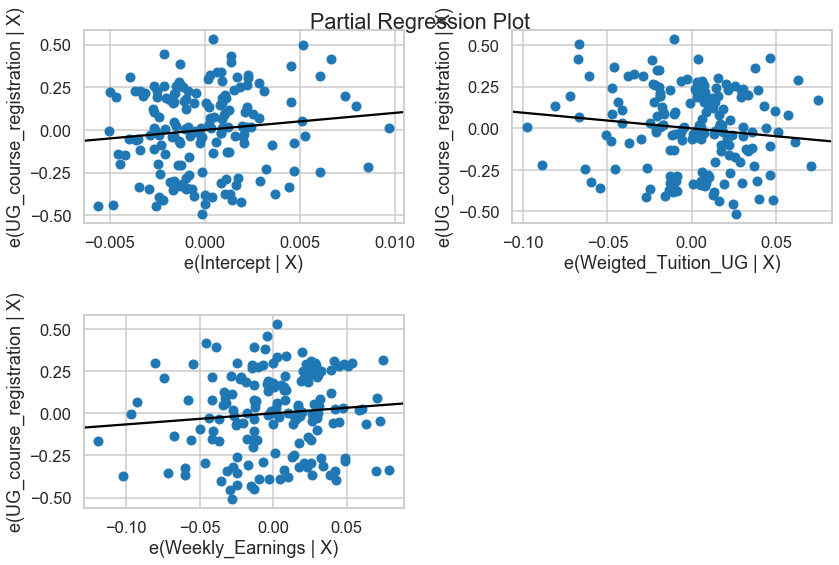

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg, fig=fig)

In [12]:
results = pd.DataFrame({'Actual_UG_course_registration': train_log['UG_course_registration'],
                        'resids': reg.resid,
                        'std_resids': reg.resid_pearson,
                        'fitted': reg.predict()})

print(results.head())

            Actual_UG_course_registration    resids  std_resids    fitted
Date                                                                     
2005-01-01                       8.809415  0.401897    1.680254  8.407518
2005-02-01                       8.180321 -0.235073   -0.982794  8.415394
2005-03-01                       8.310415 -0.077631   -0.324559  8.388046
2005-04-01                       7.973500 -0.433087   -1.810652  8.406587
2005-05-01                       8.415603  0.013703    0.057289  8.401901


### Check if some transformation is needed to make the distribution normal

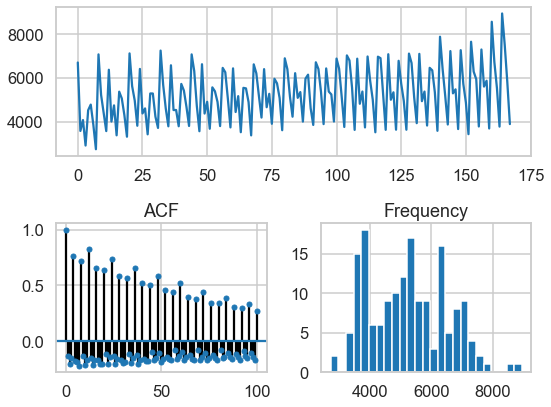

In [13]:
# Original distribution
from pmdarima.utils import tsdisplay

tsdisplay(train_df['UG_course_registration'], lag_max=100)

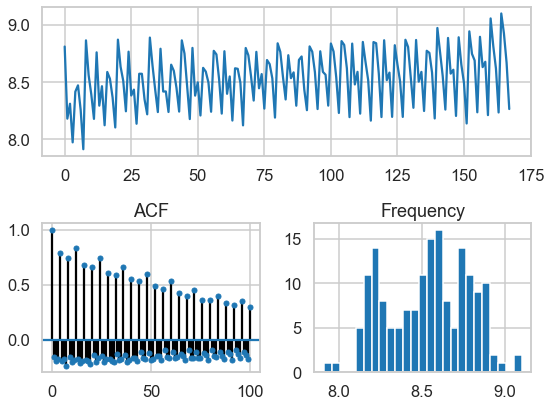

In [14]:
# Log transformed distribution
from pmdarima.preprocessing import LogEndogTransformer

y_train=train_df['UG_course_registration']
y_train_log, _ = LogEndogTransformer(lmbda=1e-6).fit_transform(y_train)
tsdisplay(y_train_log, lag_max=100)

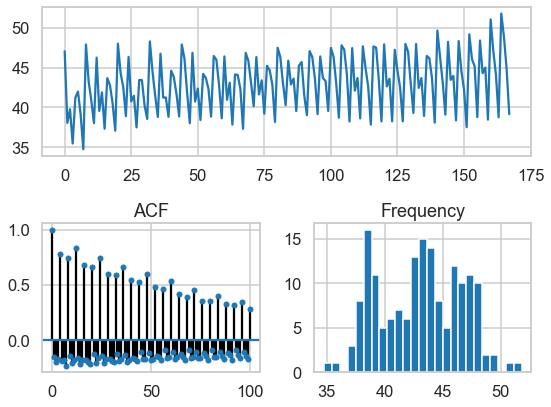

In [15]:
# Box-Cox transformed distribution
from pmdarima.preprocessing import BoxCoxEndogTransformer

y_train= train_df['UG_course_registration']
y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max=100)

### Determining parameter values to use in the SARIMAX model

The decomposition and ADF test of the data shows there are trend and seasonal components. Using auto_arima we are able to grid search for paramerters (p,q,d) that will take care of the trend and seasonality of our data.

In [26]:
from pmdarima.arima import auto_arima


step_wise=auto_arima(train_df['UG_course_registration'],
                     exogenous=train_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                     seasonal=True, m=12,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)
step_wise.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(1, 1, 1, 12) (constant=True); AIC=2256.395, BIC=2286.894, Time=2.240 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=2263.181, BIC=2275.381, Time=0.130 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=2264.016, BIC=2282.316, Time=1.205 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=2264.744, BIC=2283.044, Time=1.354 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=2285.585, BIC=2294.735, Time=0.156 seconds
Fit ARIMA: (2, 0, 2)x(0, 1, 1, 12) (constant=True); AIC=2259.163, BIC=2286.612, Time=2.240 seconds
Fit ARIMA: (2, 0, 2)x(1, 1, 0, 12) (constant=True); AIC=2256.514, BIC=2283.962, Time=1.847 seconds
Fit ARIMA: (2, 0, 2)x(2, 1, 1, 12) (constant=True); AIC=2258.245, BIC=2291.793, Time=5.136 seconds
Fit ARIMA: (2, 0, 2)x(1, 1, 2, 12) (constant=True); AIC=2257.664, BIC=2291.212, Time=5.713 seconds
Fit ARIMA: (2, 0, 2)x(0, 1, 0, 12) (constant=True); AIC=2254.560,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 12)   Log Likelihood               -1119.280
Date:                             Fri, 05 Jun 2020   AIC                           2254.560
Time:                                     12:21:46   BIC                           2278.959
Sample:                                 01-01-2005   HQIC                          2264.470
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             22.5448      9.421      2.393      0.017       4.080      41.009
Weigted_Tuition_UG     0.1196      1.453      0.082      0.934      -2.729       2.968
Weekly_Earnings       -2.7831      1.669     -1.667      0.095      -6.055       0.489
ar.L1                  1.5751      0.133     11.803      0.000       1.314       1.837
ar.L2                 -0.7341      0.120     -6.120      0.000      -0.969      -0.499
ma.L1                 -1.6176      0.117    -13.869      0.000      -1.846      -1.389
ma.L2                  0.8511      0.106      7.999      0.000       0.643       1.060
sigma2              9.852e+04   1.11e+04      8.875      0.000    7.68e+04     1.2e+05
===================================================================================
Ljung-Box (Q):                       33.97   Jarque-Bera (JB):                 7.15
Prob(Q):                              0.74   Prob(JB):                         0.03
Heteroskedasticity (H):               1.80   Skew:                             0.43
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using the optimum combination of the parameters to build the SARIMAX model

C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              2.6815     23.835      0.113      0.910     -44.034      49.397
drift                  0.1405      0.213      0.659      0.510      -0.277       0.558
Weigted_Tuition_UG    -0.2503      1.709     -0.146      0.884      -3.600       3.099
Weekly_Earnings       -3.9122      2.008     -1.948      0.051      -7.847       0.023
ar.L1                  1.0849      0.486      2.231      0.026       0.132       2.038
ar.L2                 -0.1995      0.426     -0.468      0.640      -1.035       0.636
ma.L1                 -1.0614      0.504     -2.106      0.035      -2.049      -0.073
ma.L2                  0.3295      0.357      0.922      0.357      -0.371       1.030
sigma2              1.008e+05   1.14e+04      8.827      0.000    7.84e+04    1.23e+05


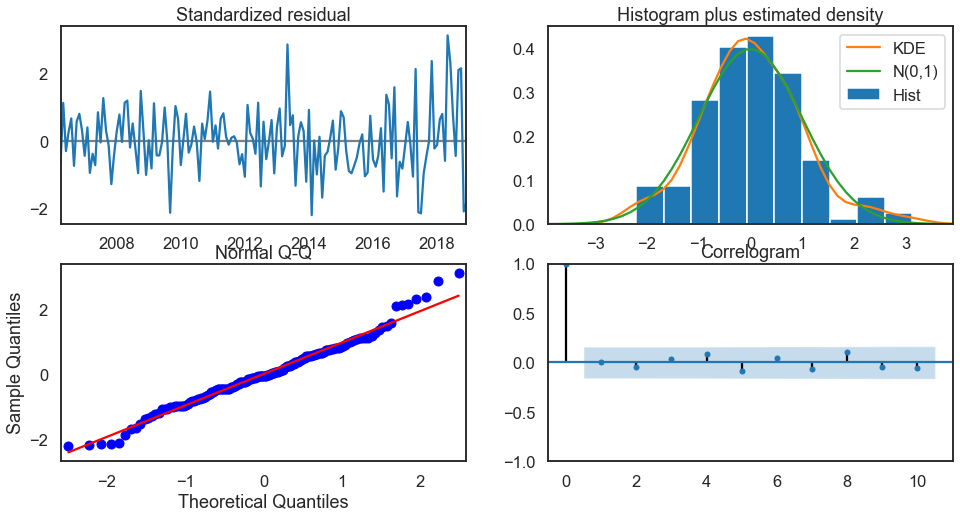

In [27]:

mod = sm.tsa.statespace.SARIMAX(train_df['UG_course_registration'],
                                exog=train_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                                trend='ct',
                                order=(2, 0, 2),
                                seasonal_order=(0, 1, [], 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [9]:
import matplotlib as mpl
sns.set_style('white')
sns.set_context('talk')

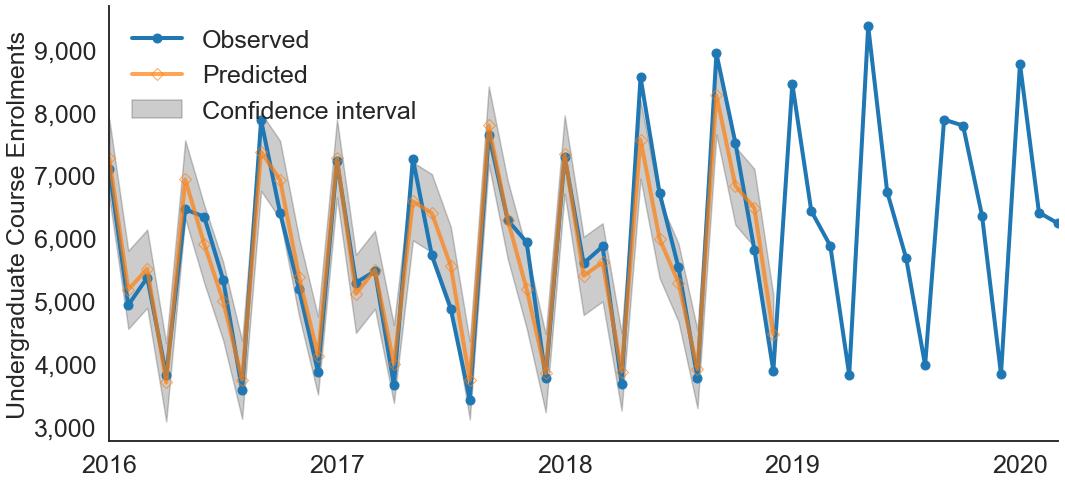

In [13]:
pred = results.get_prediction(start =pd.to_datetime('2016-01-01'), 
                                     exog=test_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                                     dynamic=False)

pred_ci = pred.conf_int()

ax = df.UG_course_registration['2016':].plot(label='Observed',
                                                   linewidth=4,
                                                   marker='o')
pred.predicted_mean.plot(ax=ax, 
                         label='Predicted', 
                         alpha=.7, 
                         figsize=(17, 8),
                         linewidth=4, 
                         marker='D',
                         fillstyle='none')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('')
ax.set_ylabel("Undergraduate Course Enrolments")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.collections[0].set_label('Confidence interval')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
    
plt.legend(frameon=False, loc=2, prop={'size': 25})

plt.savefig(r'C:\Users\inyamekye\Documents\Tuition Analysis\2020\UG Predctions.png',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0.1)


plt.show()


In [28]:
def predict(exo):
    predictions = results.predict(start =pd.to_datetime('2018-01-01'),
                                  end = pd.to_datetime('2020-02-28'),
                                  exog = exo,
                                  dynamic=False)
    return predictions

In [29]:
predictions1 = predict(exo = test_df[['Weigted_Tuition_UG', 'Weekly_Earnings']])
predictions1 = pd.DataFrame(predictions1)
predictions1['Actual'] = df.UG_course_registration['2018-01-01':'2020-03-31']
predictions1.rename(columns={0:'Pred'}, inplace=True)
predictions1 = predictions1[['Actual','Pred']]
predictions1

,Actual,Pred
2018-01-01,7292,7331.047222
2018-02-01,5597,5395.593945
2018-03-01,5865,5612.211406
2018-04-01,3682,3871.556465
2018-05-01,8560,7566.784612
2018-06-01,6722,5987.655024
2018-07-01,5530,5288.772996
2018-08-01,3768,3911.089419
2018-09-01,8939,8273.102053
2018-10-01,7514,6830.436841


### Evaluating Model

In [21]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions1['Pred'], predictions1['Actual'])
print("Root Mean Square Error:", error)

Root Mean Square Error: 486.3399191203497


### Sensitivity of model to changes in Tuition

In [31]:
test_df['Weigted_Tuition_UG1'] = test_df['Weigted_Tuition_UG']*1.01
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings,Weigted_Tuition_UG1
Date,,,,,,
2019-01-01,8455,596.516959,35.320267,0.058720,1084.728633,602.482128
2019-02-01,6429,580.255021,46.111600,0.061388,1097.125735,586.057571
2019-03-01,5877,576.251273,48.666981,0.060061,1110.113167,582.013786
2019-04-01,3819,578.871251,53.616232,0.058468,1086.100786,584.659964
2019-05-01,9373,582.883289,52.808199,0.056201,1092.822660,588.712122


In [32]:
predictions2 = predict(exo = test_df[['Weigted_Tuition_UG1', 'Weekly_Earnings']])
predictions2 = pd.DataFrame(predictions2)
predictions2.rename(columns={0:'Pred1'}, inplace=True)
predictions2.head()

,Pred1
2018-01-01,7331.047222
2018-02-01,5395.593945
2018-03-01,5612.211406
2018-04-01,3871.556465
2018-05-01,7566.784612


In [33]:
test_df['Weigted_Tuition_UG7'] = test_df['Weigted_Tuition_UG']*1.07
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings,Weigted_Tuition_UG1,Weigted_Tuition_UG7
Date,,,,,,,
2019-01-01,8455,596.516959,35.320267,0.058720,1084.728633,602.482128,638.273146
2019-02-01,6429,580.255021,46.111600,0.061388,1097.125735,586.057571,620.872872
2019-03-01,5877,576.251273,48.666981,0.060061,1110.113167,582.013786,616.588863
2019-04-01,3819,578.871251,53.616232,0.058468,1086.100786,584.659964,619.392239
2019-05-01,9373,582.883289,52.808199,0.056201,1092.822660,588.712122,623.685120


In [34]:
predictions7 = predict(exo = test_df[['Weigted_Tuition_UG7', 'Weekly_Earnings']])
predictions7 = pd.DataFrame(predictions7)
predictions7.rename(columns={0:'Pred7'}, inplace=True)
predictions7.head()

,Pred7
2018-01-01,7331.047222
2018-02-01,5395.593945
2018-03-01,5612.211406
2018-04-01,3871.556465
2018-05-01,7566.784612


In [26]:
test_df['Weigted_Tuition_UG14'] = test_df['Weigted_Tuition_UG']*1.14
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UG_course_registration,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings,Weigted_Tuition_UG1,Weigted_Tuition_UG7,Weigted_Tuition_UG14
Date,,,,,,,,
2019-01-01,8455,596.516959,35.320267,0.058720,1084.728633,602.482128,638.273146,680.029333
2019-02-01,6429,580.255021,46.111600,0.061388,1097.125735,586.057571,620.872872,661.490724
2019-03-01,5877,576.251273,48.666981,0.060061,1110.113167,582.013786,616.588863,656.926452
2019-04-01,3819,578.871251,53.616232,0.058468,1086.100786,584.659964,619.392239,659.913226
2019-05-01,9373,582.883289,52.808199,0.056201,1092.822660,588.712122,623.685120,664.486950


In [27]:
predictions14 = predict(exo = test_df[['Weigted_Tuition_UG14', 'Weekly_Earnings']])
predictions14 = pd.DataFrame(predictions14)
predictions14.rename(columns={0:'Pred14'}, inplace=True)
predictions14.head()

,Pred14
2019-01-01,7805.388706
2019-02-01,6005.758017
2019-03-01,6154.287007
2019-04-01,3991.428860
2019-05-01,8744.603682


In [28]:
predictions_wip = pd.concat([predictions1, predictions2, predictions7, predictions14], axis=1, sort=True)
predictions_wip.loc['Total'] = predictions_wip.sum(axis=0)
predictions_wip['Pred1-Pred %Change'] = (predictions_wip['Pred1']/predictions_wip['Pred'])-1
predictions_wip['Pred7-Pred %Change'] = (predictions_wip['Pred7']/predictions_wip['Pred'])-1
predictions_wip['Pred14-Pred %Change'] = (predictions_wip['Pred14']/predictions_wip['Pred'])-1
predictions_wip['Pred7/Pred1'] = predictions_wip['Pred7-Pred %Change']/predictions_wip['Pred1-Pred %Change']
predictions_wip['Pred14/Pred1'] = predictions_wip['Pred14-Pred %Change']/predictions_wip['Pred1-Pred %Change']
predictions_wip

,Actual,Pred,Pred1,Pred7,Pred14,Pred1-Pred %Change,Pred7-Pred %Change,Pred14-Pred %Change,Pred7/Pred1,Pred14/Pred1
2019-01-01 00:00:00,8455.0,7826.292474,7824.799347,7815.840590,7805.388706,-0.000191,-0.001335,-0.002671,7.0,14.0
2019-02-01 00:00:00,6429.0,6026.091917,6024.639495,6015.924967,6005.758017,-0.000241,-0.001687,-0.003374,7.0,14.0
2019-03-01 00:00:00,5877.0,6174.480604,6173.038204,6164.383806,6154.287007,-0.000234,-0.001635,-0.003270,7.0,14.0
2019-04-01 00:00:00,3819.0,4011.714269,4010.265311,4001.571565,3991.428860,-0.000361,-0.002528,-0.005057,7.0,14.0
2019-05-01 00:00:00,9373.0,8765.029685,8763.570685,8754.816684,8744.603682,-0.000166,-0.001165,-0.002330,7.0,14.0
2019-06-01 00:00:00,6734.0,7010.337393,7008.868017,7000.051764,6989.766136,-0.000210,-0.001467,-0.002934,7.0,14.0
2019-07-01 00:00:00,5678.0,5783.869126,5782.425729,5773.765350,5763.661573,-0.000250,-0.001747,-0.003494,7.0,14.0
2019-08-01 00:00:00,3971.0,4018.810255,4017.347988,4008.574387,3998.338519,-0.000364,-0.002547,-0.005094,7.0,14.0
2019-09-01 00:00:00,7885.0,9115.149049,9113.667440,9104.777786,9094.406523,-0.000163,-0.001138,-0.002276,7.0,14.0
2019-10-01 00:00:00,7790.0,7693.544093,7692.092540,7683.383224,7673.222354,-0.000189,-0.001321,-0.002641,7.0,14.0


### Converting predictions to original scale

predictions_final = np.exp(predictions_wip)
predictions_final.loc['Total'] = predictions_final.sum(axis=0)
predictions_final['Pred1-Pred %Change'] = (predictions_final['Pred1']/predictions_final['Pred'])-1
predictions_final['Pred7-Pred %Change'] = (predictions_final['Pred7']/predictions_final['Pred'])-1
predictions_final['Pred7/Pred1'] = predictions_final['Pred7-Pred %Change']/predictions_final['Pred1-Pred %Change']
predictions_final